<a href="https://colab.research.google.com/github/shreyansh273/Football-Scouting/blob/main/Player_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files = files.upload()

Saving players_value.csv to players_value.csv


In [ ]:
from google.colab import files
files = files.upload()

Saving all_players_stats.csv to all_players_stats.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
player_stats = pd.read_csv("all_players_stats.csv")
player_stats.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
player_stats.describe()

,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,npxg_per_shot,xg_net,npxg_net,passes_completed,...,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for
count,2822.000000,2822.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2823.000000,2823.000000,2283.000000,2823.000000,2823.000000,2283.000000,1917.000000,2280.000000,2820.000000,2280.000000,2820.000000,2820.000000,2820.000000,...,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2368.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2805.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,25.248760,1994.407512,19.273822,14.230252,1277.627701,14.195962,1.755933,1.219979,1.560043,0.195891,0.243712,2.506199,0.115834,0.103755,0.081034,0.184796,0.093716,0.174754,1.755567,1.568759,1.163298,2.732979,0.121933,0.078879,0.200862,0.112184,0.191064,15.115126,5.106624,30.090758,1.121622,0.346900,0.083338,0.276338,17.188904,0.604610,0.092368,0.001879,-0.007411,519.464184,...,794.558511,86.303901,265.581560,382.918794,195.475532,28.753546,734.065603,12.507801,20.954965,61.800676,13.477660,0.841489,500.283333,2605.426950,1411.249291,54.143972,16.298227,4.841489,15.672695,14.611348,615.999291,519.463830,83.207130,43.243972,24.097518,1.802433,17.244326,2.156028,1.462766,1.221986,1.435816,0.576596,2.913475,0.195819,1.972340,0.189716,0.200709,0.237943,0.239362,0.073404
std,4.611737,4.620108,11.693210,11.485120,988.133174,10.979483,3.385718,2.037250,2.891835,0.872989,1.012384,2.616231,0.344606,0.181750,0.231847,0.313194,0.163769,0.300727,3.024977,2.551499,1.666070,3.833162,0.202645,0.147818,0.268118,0.189887,0.256262,19.653641,7.710636,20.535644,1.587791,0.490105,0.108718,0.263047,5.829049,2.018901,0.058832,1.119104,1.098739,493.613365,...,681.285686,193.507619,326.242333,375.081316,222.404592,39.376651,636.744757,16.111760,26.940933,22.092792,17.300134,1.664067,447.196602,2452.768508,1391.543851,58.433134,19.444194,8.770176,19.330318,17.286087,527.190900,468.332218,16.300625,60.355604,28.325292,2.822307,19.457621,5.661786,2.785401,1.982813,2.480816,0.996705,4.175168,0.378282,2.891673,0.667893,0.618503,0.585790,0.611882,0.284272
min,14.000000,1977.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,0.000000,0.010000,-6.000000,-5.900000,0.0000

In [ ]:
player_stats2 = player_stats.copy()
cols = player_stats2.columns[26:len(player_stats2.columns)-2]
for i in range(len(cols)):
  if ('per90' in cols[i]) or ('pct' in cols[i]):
    continue
  else:
    player_stats2[cols[i]+"_per90"] = player_stats2[cols[i]]/player_stats2["minutes_90s"]
    player_stats2.drop(cols[i], axis=1, inplace=True)
player_stats2.head(2)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_on_target_pct,shots_total_per90,shots_on_target_per90,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,dribble_tackles_pct,pressure_regain_pct,...,blocks_per90,blocked_shots_per90,blocked_shots_saves_per90,blocked_passes_per90,interceptions_per90,clearances_per90,errors_per90,touches_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90,touches_live_ball_per90,dribbles_completed_per90,dribbles_per90,players_dribbled_past_per90,nutmegs_per90,carries_per90,carry_distance_per90,carry_progressive_distance_per90,progressive_carries_per90,carries_into_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,pass_targets_per90,passes_received_per90,progressive_passes_received_per90,sca_passes_live_per90,sca_passes_dead_per90,sca_dribbles_per90,sca_shots_per90,sca_fouled_per90,sca_og_for_per90,gca_passes_live_per90,gca_passes_dead_per90,gca_dribbles_per90,gca_shots_per90,gca_fouled_per90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,22,20,1777,19.7,0,1,0,0,0,2,0,0.00,0.05,0.05,0.00,0.05,1.2,1.2,0.8,2.0,0.06,0.04,0.10,0.06,0.10,33.3,0.913706,0.304569,78.9,88.7,81.3,52.0,35.7,33.5,...,1.573604,0.355330,0.050761,1.218274,1.725888,2.030457,0.050761,67.157360,3.654822,20.558376,32.639594,17.461929,1.928934,57.157360,0.456853,1.065990,0.456853,0.000000,37.208122,178.781726,96.802030,5.786802,1.522843,0.456853,0.659898,0.812183,42.385787,39.340102,2.335025,1.116751,0.152284,0.050761,0.000000,0.000000,0.0,0.101523,0.050761,0.0,0.0,0.000000
1,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,22,12,1040,11.6,6,1,6,0,0,0,0,0.52,0.09,0.61,0.52,0.61,6.4,6.4,0.9,7.3,0.56,0.07,0.63,0.56,0.63,40.6,2.758621,1.120690,68.3,78.0,60.9,60.0,16.7,23.5,...,0.775862,0.172414,0.000000,0.603448,0.172414,1.465517,0.000000,30.689655,1.810345,3.448276,14.396552,14.310345,5.689655,29.913793,0.517241,1.637931,0.517241,0.172414,15.258621,61.120690,21.724138,1.120690,0.431034,0.344828,2.241379,1.120690,42.327586,21.637931,8.275862,0.948276,0.000000,0.086207,0.258621,0.258621,0.0,0.086207,0.000000,0.0,0.0,0.086207


In [ ]:
player_stats2 = player_stats2.loc[player_stats2.games_starts>10]
player_stats2.head(2)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_on_target_pct,shots_total_per90,shots_on_target_per90,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,dribble_tackles_pct,pressure_regain_pct,...,blocks_per90,blocked_shots_per90,blocked_shots_saves_per90,blocked_passes_per90,interceptions_per90,clearances_per90,errors_per90,touches_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90,touches_live_ball_per90,dribbles_completed_per90,dribbles_per90,players_dribbled_past_per90,nutmegs_per90,carries_per90,carry_distance_per90,carry_progressive_distance_per90,progressive_carries_per90,carries_into_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,pass_targets_per90,passes_received_per90,progressive_passes_received_per90,sca_passes_live_per90,sca_passes_dead_per90,sca_dribbles_per90,sca_shots_per90,sca_fouled_per90,sca_og_for_per90,gca_passes_live_per90,gca_passes_dead_per90,gca_dribbles_per90,gca_shots_per90,gca_fouled_per90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,22,20,1777,19.7,0,1,0,0,0,2,0,0.00,0.05,0.05,0.00,0.05,1.2,1.2,0.8,2.0,0.06,0.04,0.10,0.06,0.10,33.3,0.913706,0.304569,78.9,88.7,81.3,52.0,35.7,33.5,...,1.573604,0.355330,0.050761,1.218274,1.725888,2.030457,0.050761,67.157360,3.654822,20.558376,32.639594,17.461929,1.928934,57.157360,0.456853,1.065990,0.456853,0.000000,37.208122,178.781726,96.802030,5.786802,1.522843,0.456853,0.659898,0.812183,42.385787,39.340102,2.335025,1.116751,0.152284,0.050761,0.000000,0.000000,0.0,0.101523,0.050761,0.0,0.0,0.000000
1,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,22,12,1040,11.6,6,1,6,0,0,0,0,0.52,0.09,0.61,0.52,0.61,6.4,6.4,0.9,7.3,0.56,0.07,0.63,0.56,0.63,40.6,2.758621,1.120690,68.3,78.0,60.9,60.0,16.7,23.5,...,0.775862,0.172414,0.000000,0.603448,0.172414,1.465517,0.000000,30.689655,1.810345,3.448276,14.396552,14.310345,5.689655,29.913793,0.517241,1.637931,0.517241,0.172414,15.258621,61.120690,21.724138,1.120690,0.431034,0.344828,2.241379,1.120690,42.327586,21.637931,8.275862,0.948276,0.000000,0.086207,0.258621,0.258621,0.0,0.086207,0.000000,0.0,0.0,0.086207


array([ 26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120])

In [ ]:
req_cols = ["player"]+player_stats2.columns[np.arange(26,len(player_stats2.columns))].tolist()
req_cols.remove("League")
forwards_cluster_data = player_stats2.loc[player_stats2.position == "FW", req_cols]
forwards_cluster_data.head(1)

,player,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_on_target_pct,shots_total_per90,shots_on_target_per90,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,dribble_tackles_pct,pressure_regain_pct,dribbles_completed_pct,passes_received_pct,sca_per90,gca_per90,gca_og_for,goals_per_shot_per90,goals_per_shot_on_target_per90,distance_from_goal_per90,shots_free_kicks_per90,npxg_per_shot_per90,xg_net_per90,npxg_net_per90,passes_completed_per90,passes_per90,passes_total_distance_per90,passes_progressive_distance_per90,passes_completed_short_per90,passes_short_per90,passes_completed_medium_per90,passes_medium_per90,passes_completed_long_per90,passes_long_per90,xa_net_per90,assisted_shots_per90,passes_into_final_third_per90,...,blocks_per90,blocked_shots_per90,blocked_shots_saves_per90,blocked_passes_per90,interceptions_per90,clearances_per90,errors_per90,touches_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90,touches_live_ball_per90,dribbles_completed_per90,dribbles_per90,players_dribbled_past_per90,nutmegs_per90,carries_per90,carry_distance_per90,carry_progressive_distance_per90,progressive_carries_per90,carries_into_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,pass_targets_per90,passes_received_per90,progressive_passes_received_per90,sca_passes_live_per90,sca_passes_dead_per90,sca_dribbles_per90,sca_shots_per90,sca_fouled_per90,sca_og_for_per90,gca_passes_live_per90,gca_passes_dead_per90,gca_dribbles_per90,gca_shots_per90,gca_fouled_per90
1,Tammy Abraham,0.56,0.07,0.63,0.56,0.63,40.6,2.758621,1.12069,68.3,78.0,60.9,60.0,16.7,23.5,31.6,51.1,1.551724,0.172414,0.0,0.016379,0.039655,0.836207,0.0,0.017241,-0.034483,-0.034483,12.844828,18.793103,177.327586,28.189655,7.931034,10.172414,3.362069,5.517241,0.775862,1.293103,0.008621,0.689655,1.034483,...,0.775862,0.172414,0.0,0.603448,0.172414,1.465517,0.0,30.689655,1.810345,3.448276,14.396552,14.310345,5.689655,29.913793,0.517241,1.637931,0.517241,0.172414,15.258621,61.12069,21.724138,1.12069,0.431034,0.344828,2.241379,1.12069,42.327586,21.637931,8.275862,0.948276,0.0,0.086207,0.258621,0.258621,0.0,0.086207,0.0,0.0,0.0,0.086207


In [ ]:
forwards_cluster_data = forwards_cluster_data[~forwards_cluster_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
y = forwards_cluster_data["player"]
X = forwards_cluster_data.drop("player", axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
errors = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=52)
  kmeans.fit(X_scaled)
  errors.append(kmeans.inertia_) 
  forwards_cluster_data["cluster_"+str(i)] = kmeans.labels_.tolist()

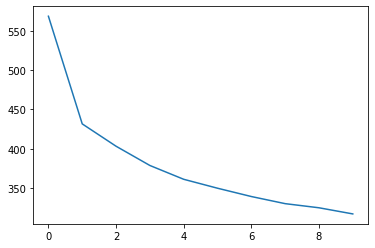

In [ ]:
fig, ax = plt.subplots()
ax.plot(errors)

In [ ]:
errors

[568.6649437129274,
 431.6808748564931,
 403.2616593379384,
 378.7632081153321,
 361.18791366386006,
 349.82333993611223,
 339.25143571742217,
 330.181935131593,
 324.93143370150295,
 317.1199456676403]

In [ ]:
forwards_cluster_data.groupby("cluster_8").size()

cluster_8
0    22
1    53
2    15
3     9
4    16
5     9
6    30
7    34
dtype: int64

In [ ]:
errors = []
for i in range(1,100):
  kmeans = KMeans(n_clusters=8)
  kmeans.fit(X_scaled)
  errors.append(kmeans.inertia_)

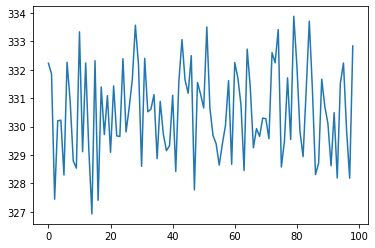

In [ ]:
fig, ax = plt.subplots()
ax.plot(errors)

In [106]:
forwards_cluster_data.groupby(["cluster_8"])['xg_per90', 'xa_per90','shots_total_per90','shots_on_target_per90', 'passes_pct_short', 'passes_pct_medium', 'passes_pct_long','sca_per90','gca_per90','tackles_per90', 'blocks_per90', 'clearances_per90'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,xg_per90,xa_per90,shots_total_per90,shots_on_target_per90,passes_pct_short,passes_pct_medium,passes_pct_long,sca_per90,gca_per90,tackles_per90,blocks_per90,clearances_per90
cluster_8,,,,,,,,,,,,
0,0.383636,0.159091,2.597461,1.070372,83.790909,79.490909,60.545455,3.068938,0.345364,0.841276,0.857221,0.372988
1,0.326038,0.075283,2.091714,0.781584,76.284906,68.243396,59.847170,1.577619,0.214000,0.623046,0.771780,0.909378
2,0.618667,0.170667,3.268174,1.345196,78.820000,74.093333,64.873333,3.185536,0.590585,0.547957,0.700783,0.624466
3,0.268889,0.234444,2.585239,0.925663,87.711111,83.744444,65.955556,4.146051,0.551891,0.997004,0.952565,0.255845
4,0.282500,0.118125,2.178558,0.747855,82.362500,76.331250,54.862500,2.733382,0.343413,1.657967,1.466087,0.651703
5,0.620000,0.220000,3.434932,1.459135,85.333333,81.066667,59.422222,4.033708,0.740281,0.480038,0.651893,0.402490
6,0.532667,0.121000,2.720834,1.137234,80.460000,73.786667,69.700000,2.173648,0.350278,0.561525,0.628657,0.557775
7,0.359118,0.122353,2.411241,0.935328,77.123529,71.405882,60.476471,2.212596,0.325770,0.953386,1.042608,0.697827


In [125]:
forwards_cluster_data[forwards_cluster_data.cluster_8==4]

,player,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_on_target_pct,shots_total_per90,shots_on_target_per90,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,dribble_tackles_pct,pressure_regain_pct,dribbles_completed_pct,passes_received_pct,sca_per90,gca_per90,gca_og_for,goals_per_shot_per90,goals_per_shot_on_target_per90,distance_from_goal_per90,shots_free_kicks_per90,npxg_per_shot_per90,xg_net_per90,npxg_net_per90,passes_completed_per90,passes_per90,passes_total_distance_per90,passes_progressive_distance_per90,passes_completed_short_per90,passes_short_per90,passes_completed_medium_per90,passes_medium_per90,passes_completed_long_per90,passes_long_per90,xa_net_per90,assisted_shots_per90,passes_into_final_third_per90,...,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90,touches_live_ball_per90,dribbles_completed_per90,dribbles_per90,players_dribbled_past_per90,nutmegs_per90,carries_per90,carry_distance_per90,carry_progressive_distance_per90,progressive_carries_per90,carries_into_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,pass_targets_per90,passes_received_per90,progressive_passes_received_per90,sca_passes_live_per90,sca_passes_dead_per90,sca_dribbles_per90,sca_shots_per90,sca_fouled_per90,sca_og_for_per90,gca_passes_live_per90,gca_passes_dead_per90,gca_dribbles_per90,gca_shots_per90,gca_fouled_per90,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
219,Daniel James,0.23,0.12,0.34,0.23,0.34,35.3,1.683168,0.594059,78.0,85.8,77.3,63.6,8.7,20.8,50.0,72.7,1.584158,0.297030,0.0,0.017822,0.049505,1.653465,0.000000,0.013861,0.069307,0.069307,23.465347,30.099010,322.475248,74.653465,14.950495,17.425743,6.732673,8.712871,0.693069,1.089109,-0.019802,0.990099,0.594059,...,16.435644,23.069307,4.257426,41.485149,0.891089,1.782178,1.089109,0.000000,31.089109,188.217822,116.435644,6.039604,1.683168,1.089109,1.782178,2.079208,41.782178,30.396040,5.148515,1.386139,0.000000,0.000000,0.000000,0.198020,0.000000,0.297030,0.000000,0.000000,0.000000,0.000000,0,1,1,3,4,3,3,4,4,9
369,Nicolas Pépé,0.39,0.05,0.44,0.35,0.39,41.7,2.666667,1.111111,75.7,84.3,81.5,47.5,33.3,25.6,39.7,74.1,2.055556,0.500000,0.0,0.010556,0.025000,0.855556,0.055556,0.007222,0.166667,0.155556,28.333333,37.444444,413.722222,81.444444,16.444444,19.500000,9.555556,11.722222,1.555556,3.277778,0.005556,0.611111,0.944444,...,19.277778,28.833333,6.388889,49.777778,1.722222,4.333333,1.777778,0.277778,38.722222,187.611111,107.500000,5.888889,1.000000,1.722222,1.500000,2.000000,51.833333,38.388889,7.833333,1.333333,0.166667,0.222222,0.166667,0.166667,0.000000,0.222222,0.000000,0.111111,0.111111,0.055556,0,1,1,3,4,3,3,4,4,5
397,Richarlison,0.36,0.10,0.46,0.34,0.44,39.0,2.578616,1.006289,69.2,79.2,71.3,58.1,31.0,24.9,55.9,60.5,2.515723,0.283019,0.0,0.002201,0.005975,0.455975,0.031447,0.004088,-0.141509,-0.147799,16.792453,24.276730,260.157233,54.874214,9.339623,11.792453,5.849057,8.207547,1.132075,1.949686,-0.006289,0.786164,0.754717,...,17.610063,18.710692,4.937107,37.767296,1.949686,3.490566,2.012579,0.220126,28.270440,184.465409,112.044025,5.314465,2.138365,1.257862,1.855346,2.106918,44.308176,26.792453,7.327044,1.603774,0.000000,0.283019,0.157233,0.440252,0.031447,0.157233,0.000000,0.062893,0.031447,0.031447,0,1,1,3,4,3,3,4,4,5
480,Adama Traoré,0.08,0.18,0.26,0.08,0.26,30.2,1.462585,0.442177,65.9,77.6,67.6,50.5,45.0,31.0,74.8,71.0,3.843537,0.204082,0.0,0.001701,0.005102,0.656463,0.000000,0.001701,-0.006803,-0.006803,19.693878,29.863946,322.040816,81.972789,10.136054,13.061224,7.176871,10.612245,1.768707,3.503401,-0.115646,1.904762,1.462585,...,22.857143,23.163265,3.979592,43.979592,5.442177,7.278912,5.884354,0.170068,38.877551,292.346939,193.163265,10.408163,2.925170,2.040816,2.857143,2.925170,48.945578,34.761905,5.102041,2.517007,0.000000,0.714286,0.102041,0.442177,0.068027,0.102041,0.000000,0.034014,0.034014,0.034014,0,1,1,3,4,3,3,4,4,5
481,Bert

In [97]:
player_stats2 = player_stats2.merge(forwards_cluster_data[["player","cluster_8"]], how='left', on="player")

In [98]:
player_stats2.rename(columns = {"cluster_8":"fw_cluster"}, inplace=True)

In [107]:
player_alt_stats = player_stats2[player_stats2.fw_cluster == player_stats2.loc[player_stats2.player.str.contains("Kane"),"fw_cluster"].tolist()[0]].sort_values("goals_assists_pens_per90", ascending=False)
player_alt_stats.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_on_target_pct,shots_total_per90,shots_on_target_per90,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,dribble_tackles_pct,pressure_regain_pct,...,blocked_shots_per90,blocked_shots_saves_per90,blocked_passes_per90,interceptions_per90,clearances_per90,errors_per90,touches_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90,touches_live_ball_per90,dribbles_completed_per90,dribbles_per90,players_dribbled_past_per90,nutmegs_per90,carries_per90,carry_distance_per90,carry_progressive_distance_per90,progressive_carries_per90,carries_into_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,pass_targets_per90,passes_received_per90,progressive_passes_received_per90,sca_passes_live_per90,sca_passes_dead_per90,sca_dribbles_per90,sca_shots_per90,sca_fouled_per90,sca_og_for_per90,gca_passes_live_per90,gca_passes_dead_per90,gca_dribbles_per90,gca_shots_per90,gca_fouled_per90,fw_cluster
799,Robert Lewandowski,pl POL,FW,Bayern Munich,31.0,1988.0,29,28,2458,27.3,41,7,33,8,9,4,0,1.50,0.26,1.76,1.21,1.46,31.6,24.7,3.6,28.4,1.16,0.13,1.29,0.90,1.04,43.1,4.761905,2.051282,76.5,81.7,80.2,73.0,28.6,32.4,...,0.073260,0.00000,0.256410,0.256410,0.293040,0.0,38.461538,0.402930,1.721612,14.615385,24.212454,8.644689,37.069597,0.915751,1.648352,0.952381,0.036630,25.164835,121.245421,54.908425,3.516484,1.062271,0.879121,2.490842,1.904762,51.391941,30.659341,9.340659,1.941392,0.036630,0.183150,0.329670,0.183150,0.036630,0.439560,0.00000,0.109890,0.036630,0.073260,2.0
144,Harry Kane,eng ENG,FW,Tottenham,27.0,1993.0,35,35,3082,34.2,23,14,19,4,4,1,0,0.67,0.41,1.08,0.55,0.96,20.5,17.5,7.4,24.8,0.60,0.22,0.81,0.51,0.73,35.1,3.918129,1.374269,70.1,77.9,74.7,60.0,25.0,25.3,...,0.380117,0.02924,0.497076,0.438596,1.198830,0.0,40.818713,1.461988,4.152047,21.520468,18.011696,4.853801,39.210526,1.345029,2.309942,1.374269,0.233918,26.228070,134.970760,74.181287,4.385965,1.549708,0.760234,1.783626,2.076023,51.491228,30.847953,6.520468,2.046784,0.058480,0.526316,0.263158,0.350877,0.058480,0.438596,0.02924,0.175439,0.000000,0.087719,2.0
880,André Silva,pt POR,FW,Eint Frankfurt,24.0,1995.0,32,32,2760,30.7,28,7,21,7,7,1,0,0.91,0.23,1.14,0.68,0.91,24.3,18.9,5.5,24.5,0.79,0.18,0.97,0.62,0.80,49.5,3.485342,1.726384,74.1,79.8,76.8,64.7,37.5,29.7,...,0.032573,0.00000,0.358306,0.130293,0.456026,0.0,37.231270,0.651466,1.986971,16.351792,20.944625,6.579805,34.690554,0.977199,1.889251,1.042345,0.032573,22.671010,98.729642,51.563518,3.159609,1.042345,1.205212,2.312704,1.889251,57.263844,28.045603,10.488599,1.726384,0.032573,0.228013,0.260586,0.195440,0.032573,0.195440,0.00000,0.032573,0.097720,0.130293,2.0
1086,Romelu Lukaku,be BEL,FW,Inter,27.0,1993.0,36,32,2884,32.0,24,11,18,6,6,4,0,0.75,0.34,1.09,0.56,0.90,22.7,18.1,7.8,25.9,0.71,0.24,0.95,0.57,0.81,47.2,2.781250,1.312500,72.5,82.4,65.3,64.3,30.0,27.5,...,0.156250,0.00000,0.437500,0.093750,1.062500,0.0,36.625000,1.156250,2.031250,16.000000,20.875000,7.468750,34.781250,1.187500,2.156250,1.250000,0.062500,25.750000,118.281250,73.593750,3.750000,1.437500,1.312500,2.750000,1.937500,49.031250,29.187500,12.093750,2.750000,0.000000,0.375000,0.312500,0.125000,0.000000,0.625000,0.00000,0.062500,0.062500,0.000000,2.0
420,Andy Delort,dz ALG,FW,Montpellier,28.0,1991.0,30,30,2482,27.6,15,9,15,0,1,4,0,0.54,0.33,0.87,0.54,0.87,10.8,10.0,5.9,15.9,0.39,0.21,0.60,0.36,0.58,37.4,3.297101,1.231884,62.1,74.0,60.5,50.0,25.0,28.0,...,0.072464,0.00000,0.362319,0.144928,1.014493,0.0,44.637681,1.159420,3.079710,19.710145,23.731884,5.760870,41.920290,1.376812,2.536232,1.413043,0.036232,23.840580,99.673913,52.572464,

In [100]:
player_alt_stats.to_csv("kane_alts.csv")

In [101]:
from google.colab import files
files.download("kane_alts.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>